   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0         0.0  27-12-2015          1.33      64236.62  1036.74   54454.85   
1         1.0  20-12-2015          1.35      54876.98   674.28   44638.81   
2         2.0  13-12-2015          0.93     118220.22   794.70  109149.67   
3         3.0  06-12-2015          1.08      78992.15  1132.00   71976.41   
4         4.0  29-11-2015          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

     year  region  
0  2015.0  Albany  
1  2015.0  Albany  
2  2015.0  Albany  


C:\Users\smund\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


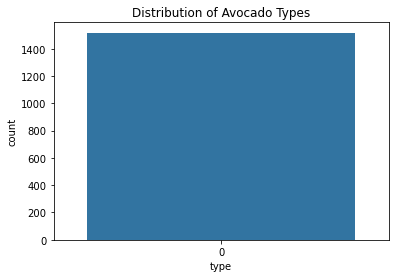

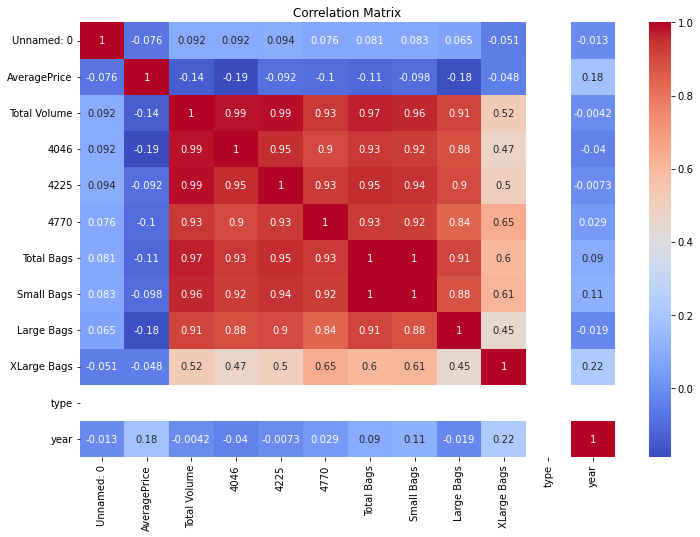

Classification Accuracy: 1.0
Confusion Matrix:
 [[304]]
Regression RMSE: 0.17241694637389685
R-squared: 0.1528844229515418


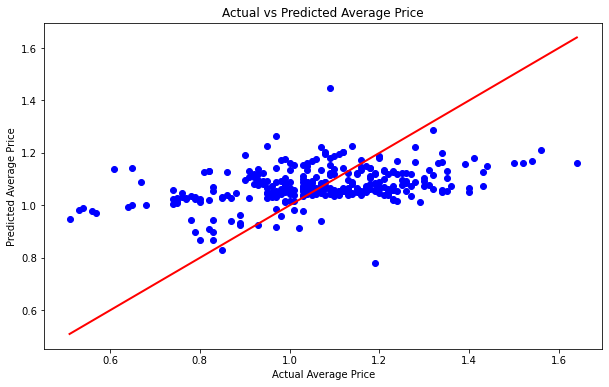

In [2]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score

# Step 2: Load the dataset
url = "https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv"
data = pd.read_csv(url)

# Step 3: Explore the data
print(data.head())
print(data.info())
print(data.describe())

# Step 4: Check for missing values (NaNs)
missing_values = data.isnull().sum()
print(f"Missing values in the dataset:\n{missing_values}")

# Handle missing values: Option to drop rows with NaNs or fill them with mean/median
# Here, we will drop rows with any NaN values for simplicity
data = data.dropna()

# Step 5: Check for infinity or very large values
data.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace infinity with NaN
data = data.dropna()  # Drop rows with NaN (infinity values will also be removed)

# Step 6: Convert categorical features to numerical (for 'type')
le = LabelEncoder()
data['type'] = le.fit_transform(data['type'])  # 'conventional' becomes 0, 'organic' becomes 1

# Step 7: Visualize the data
# Distribution of avocado types
sns.countplot(data['type'])
plt.title('Distribution of Avocado Types')
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Step 8: Feature selection for Classification Task
X_class = data.drop(columns=['Date', 'AveragePrice', 'type', 'region'])  # Features for classification
y_class = data['type']  # Target for classification (avocado type)

# Train-test split for classification (80% train, 20% test)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Step 9: Classification task - Predict avocado type using Random Forest
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_class, y_train_class)

# Predictions
y_pred_class = classifier.predict(X_test_class)

# Evaluate the classification model
accuracy = accuracy_score(y_test_class, y_pred_class)
conf_matrix = confusion_matrix(y_test_class, y_pred_class)

print(f"Classification Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)

# Step 10: Feature selection for Regression Task
X_reg = data.drop(columns=['Date', 'AveragePrice', 'region'])  # Features for regression
y_reg = data['AveragePrice']  # Target for regression (average price)

# Train-test split for regression (80% train, 20% test)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Step 11: Regression task - Predict average price using Linear Regression
regressor = LinearRegression()
regressor.fit(X_train_reg, y_train_reg)

# Predictions
y_pred_reg = regressor.predict(X_test_reg)

# Evaluate the regression model
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"Regression RMSE: {rmse}")
print(f"R-squared: {r2}")

# Step 12: Plot actual vs predicted average prices (Regression)
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg, color='blue')
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], color='red', lw=2)
plt.xlabel('Actual Average Price')
plt.ylabel('Predicted Average Price')
plt.title('Actual vs Predicted Average Price')
plt.show()
